# Movimiento Browniano Geométrico (MBG)
Supongamos que:
* $S_t$ es el precio de un activo al tiempo $t$.
* $\mu > 0$ representa la tasa de crecimiento esperada del activo.
* $\sigma >0$ es el parámetro de volatilidad del activo.
* $\{W_t\}_{t\geq0}$ es un Movimiento Browniano estándar.
* $S_0 > 0$ es valor del activo al tiempo $t=0$.

Se puede demostrar que $$S_t = S_0 e^{(\mu - \frac{1}{2}\sigma ^2)t + \sigma W_t}$$ y usando las propiedades del MBE, obtenemos que
$$S_t \sim \operatorname{LogNormal} (\text{ln}(S_0) + (\mu - \frac{1}{2}\sigma ^2)t, \sigma ^2t)$$

El proceso estocástico $\{S_t\}_{t\geq0}$ se conoce como Movimiento Browniano Geométrico (MBG).

Veremos cómo simular sus trayectorias, estimar sus parámetros y aplicaremos esto a una base de datos real.

### Simulación de Trayectorias

Para simular las trayectorias de este proceso usaremos cómo lo definimos antes. Existen métodos para simular este tipo de proceso, los detalles se pueden consultar en el libro [Stochastic Differential Equations](https://link.springer.com/book/10.1007/978-3-642-14394-6), al cual se puede acceder con el correo institucional. A continuación el código.

In [1]:
import numpy as np
import random
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

def MBG(S0, mu, sigma, T, N):
  '''
  S0: Precio inicial del activo
  mu: Tasa de retorno esperada
  sigma: Volatilidad del activo
  T: Tiempo total de simulación (en años)
  N: Número de pasos en la simulación
  '''
  dt = T / N # Tamaño del paso
  t = np.linspace(0, T, N + 1) # Vector de tiempo

  # Generamos el MBE
  W = np.random.normal(loc=0, scale=np.sqrt(dt), size=N)
  W = np.concatenate(([0], np.cumsum(W)))

  # Aplicamos método de Euler
  S = S0 * np.exp((mu - 0.5 * sigma ** 2) * t + sigma * W)
  return S

##### Ejemplo

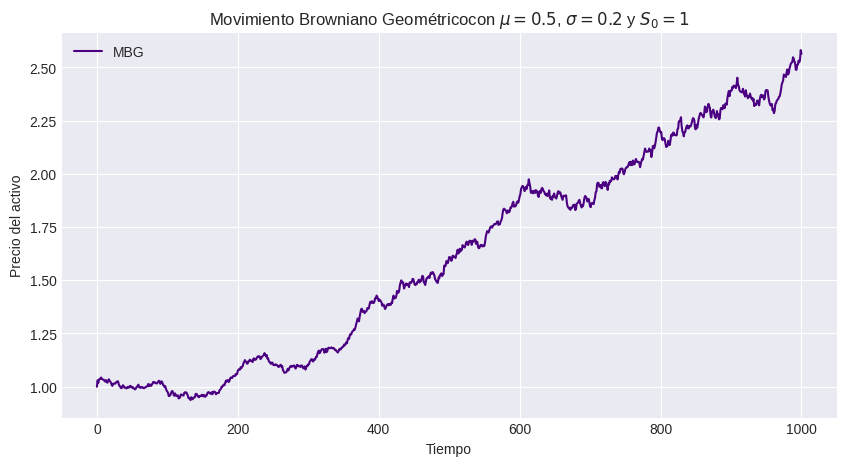

In [2]:
# Definimos los parámetros del proceso
S_0 = 1
mu = 0.5
sigma = 0.2
T = 1
N = 1000

# Simulamos la trayectoria
S = MBG(S_0, mu, sigma, T, N)

# Graficamos la trayectoria
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-v0_8-dark')
plt.plot(S, color = 'indigo', label = 'MBG')
plt.title(f'Movimiento Browniano Geométricocon $\mu = {mu}$, $\sigma = {sigma}$ y $S_0 = {S_0}$')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Precio del activo')
plt.grid()
plt.show()

Veamos cómo se ven los precios de algunos activos financieros en el mercado



Hacemos una función para graficar la trayectoria

In [3]:
def plot_trayectoria_MBG(S_0, mu, sigma, T, N):
  '''
  S0: Precio inicial del activo
  mu: Tasa de retorno esperada
  sigma: Volatilidad del activo
  T: Tiempo total de simulación (en años)
  N: Número de pasos en la simulación
  '''
  # Simulamos la trayectoria
  S = MBG(S_0, mu, sigma, T, N)
  # Graficamos la trayectoria
  plt.figure(figsize=(10, 5))
  plt.style.use('seaborn-v0_8-dark')
  plt.plot(S, color = 'indigo')
  plt.title(f'Movimiento Browniano Geométrico con $\mu = {mu}$, $\sigma = {sigma}$ y $S_0 = {S_0}$')
  plt.xlabel('Tiempo')
  plt.ylabel('Precio del activo')
  plt.grid()
  plt.show()
  return None

Ahora probamos la función

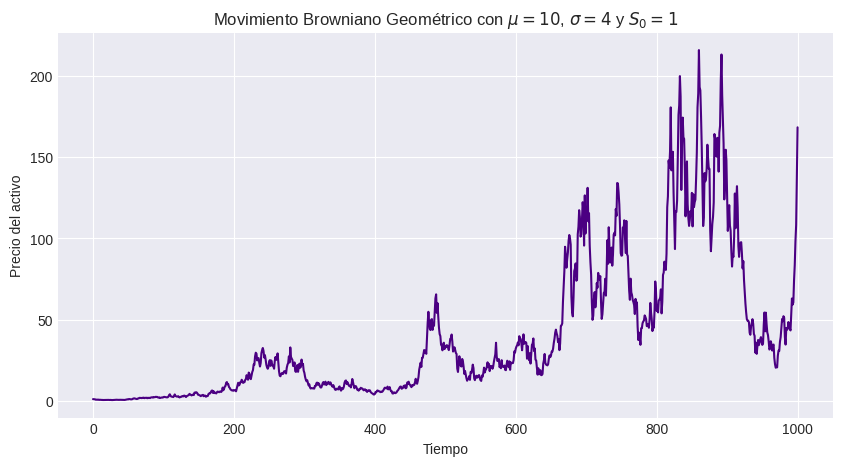

In [4]:
plot_trayectoria_MBG(1, 10, 4, 1, 1000)

### Estimación de Parámetros

Como $S_t \sim \operatorname{LogNormal} (\text{ln}(S_0) + (\mu - \frac{1}{2}\sigma ^2)t, \sigma ^2t)$, entonces podemos usar máxima verosimilitud para encontrar estimadores de $\mu$ y $\sigma ^2$. Al calcular la función de verosimilitud y maximizar se obtienen los siguientes estimadores:

$$ \hat{\mu} = \frac{\bar{Y}}{\Delta t} + \frac{\hat{\sigma}^2}{2} $$
$$ \hat{\sigma}^2 = \frac{1}{n\Delta t} \sum_{i=1}^n (Y_{i}-\bar{Y})^2 $$

donde el proceso $Y_t = \text{ln}(\frac{S_{t_i}}{S_{t_{i-1}}})$.

La prueba de esto se puede consultar el documento [Estimación Paramétrica del MBG](https://github.com/eliasegn/Proyecto-I/blob/main/Estimaci%C3%B3n_Param%C3%A9trica_MBG.pdf).

Veamos algunas simulaciones con datos y calculemos los estimadores para cada caso.

Valor de mu: 1 
Estimador de mu: 1.014244389740987
Valor de sigma: 0.1 
Estimador de sigma: 0.09946372312357955


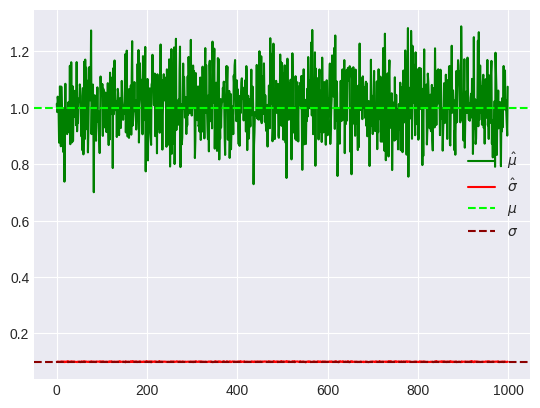

Media de mu: 1.0096114812945682
Media de sigma: 0.09944570951816314


In [5]:
# Ejemplo 1
np.random.seed(4)
S_02 = 30
mu2 = 1
sigma2 = 0.1
T2 = 1
N2 = 10000
dt = T2 / N2

# Simulamos la trayectoria
S2 = MBG(S_02, mu2, sigma2, T2, N2)
Y2 = np.diff(np.log(S2))
n = len(Y2)

# Calculamos estimadores de mu y sigma
sigma_est2 = np.sqrt( (1 / (dt * n)) * np.sum((Y2 - np.mean(Y2)) ** 2) )
mu_est2 = (np.mean(Y2) / dt) + (0.5 * sigma_est2**2)

# Imprimimos los valores reales junto con los estimadores
print('Valor de mu:', mu2, '\nEstimador de mu:', mu_est2)
print('Valor de sigma:', sigma2, '\nEstimador de sigma:', sigma_est2)

# Segunda Parte: Cálculo para 1000 trayectorias
trayectorias = 1000

# Inicializamos listas donde guardaremos estimadores por trayectoria
mu_tray = np.zeros(trayectorias)
sigma_tray = np.zeros(trayectorias)

# Generamos trayectorias, calculamos los estimadores y los guardamos
for i in range(trayectorias):
  S_tray = MBG(S_02, mu_est2, sigma_est2, T2, N2)
  Y_tray = np.diff(np.log(S_tray))
  sigma_tray[i] = np.sqrt( (1 / (dt * n)) * np.sum((Y_tray - np.mean(Y_tray)) ** 2) )
  mu_tray[i] = (np.mean(Y_tray) / dt) + (sigma_tray[i]**2 / 2)

# Graficamos la evolución de los estimadores
plt.figure()
plt.style.use('seaborn-v0_8-dark')
plt.plot(mu_tray, color = 'green')
plt.plot(sigma_tray, color = 'red')
plt.axhline(y=mu2, color='lime', linestyle='--')
plt.axhline(y=sigma2, color='darkred', linestyle='--')
plt.legend(['$\hat{\mu}$', '$\hat{\sigma}$', '$\mu$', '$\sigma$'])
plt.grid()
plt.show()

# Imprimimos la media de los estimadores
print('Media de mu:', np.mean(mu_tray))
print('Media de sigma:', np.mean(sigma_tray))

### Bases de Datos de Activos Financieros y Ajuste

Se obtuvieron de [Yahoo Finance](https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAALeFtyqsV9wAKVe4rpQSCtJKPMH2xMeLgR7i-YR786BcV1JO1KGsHnDgOkAFu9HUX2z3nAtX1SN5GZxj9dxCJZCInirXOCIF7ASjHmKzQHhpbwBHk99flS-yXCxz8cqnPgCo4ZAf3tqp89ZIUwUvGph1d6eSpjAYeTdXr45T-xY) los datos de las acciones de Apple en el año 2020 (del 2020-01-01 al 2020-12-31). Estos datos se encuentran en este [enlace](https://github.com/eliasegn/ProcesosI/blob/main/MB2_AAPL.txt) y se cargan a continuación.

In [74]:
# Importamos los datos
import pandas as pd
data = pd.read_csv('MB2_AAPL.txt', sep=',')
data = data.drop(index=0)
data.head()

,Close,High,Low,Open,Volume
1,72.62084197998047,72.68128882574726,71.37321819790198,71.62709199861638,135480400
2,71.9148178100586,72.67644657227763,71.68995732022762,71.84711763961168,146322800
3,72.48786163330078,72.52654850385467,70.78326336625187,71.03472433546915,118387200
4,72.14693450927734,72.75381577050801,71.9269071243437,72.49752175701711,108872000
5,73.30753326416016,73.60976755896645,71.84955532116523,71.84955532116523,132079200


Como nos interesa solo la información de las acciones en general, tomamos las del cierre. Dado que el año, en días hábiles, tiene 252 semanas, nos quedamos con las primeras 252 entradas (que corresponden al 2020)

In [75]:
# Recortamos a solo el cierre durante un año
data = data['Close']
data = data[:252]
data.head()

,Close
1,72.62084197998047
2,71.9148178100586
3,72.48786163330078
4,72.14693450927734
5,73.30753326416016


In [20]:
# Convertimos los datos a flotantes y redondeamos
data = np.array(data)
data = data.astype(float)
data = np.round(data, 2)

Ahora veamos cómo se ven las acciones de Apple

Text(0, 0.5, 'Precio')

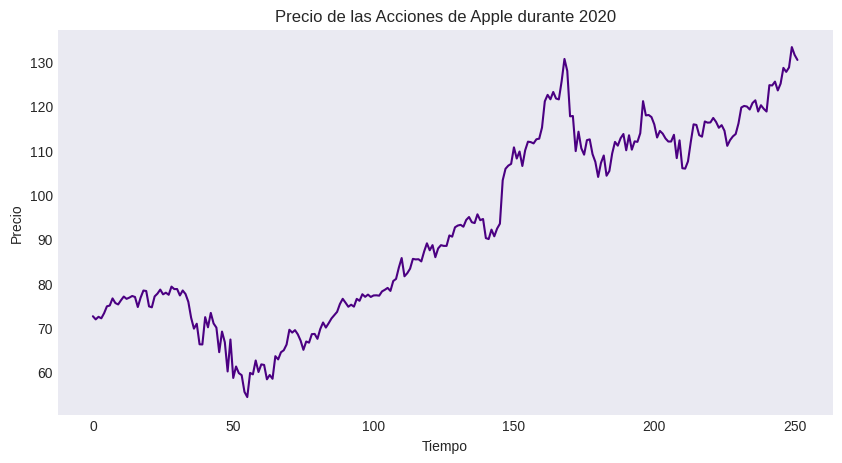

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(10,5))
plt.style.use('seaborn-v0_8-dark')
plt.plot(data, color = 'indigo')
plt.title(f'Precio de las Acciones de Apple durante 2020')
plt.xlabel('Tiempo')
plt.ylabel('Precio')

Ahora calculamos los estimadores, usando funciones auxiliares que solo reciben el proceso y el tamaño de paso y devuelven los estimadores

In [30]:
import numpy as np

def estimadores(S, diferencia=1/252):
  # Calculamos diferencias logarítmicas
  S = np.array(S)
  Y = np.diff(np.log(S))
  N = len(S)

  # Estimadores
  estimador_sigmac = np.sqrt((1 / (N * diferencia)) * np.sum((Y - np.mean(Y))**2))
  estimador_mu = np.mean(Y) / diferencia + estimador_sigmac / 2

  # Devolvemos los estimadores
  return estimador_mu, estimador_sigmac

# Imprimimos los estimadores
mu_hat, sigma_hat = estimadores(data)
print('Estimador de mu:', mu_hat)
print('Estimador de sigma:', sigma_hat)

Estimador de mu: 0.821110430460363
Estimador de sigma: 0.4662081740394344


Por tanto, los estimadores son $\hat{\mu} = 0.82111$ y $\hat{\sigma ^2} = 0.466208$. Ahora calcularemos trayectorias del MBG con estos parámetros y empezando desde el punto de partida del proceso de Apple.

Text(0.5, 0, 'Tiempo')

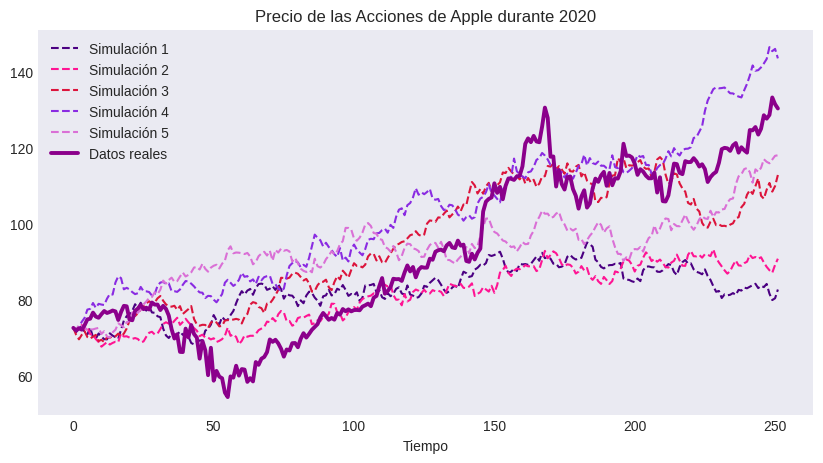

In [72]:
np.random.seed(123)

# Definimos los parámetros del proceso
S_inicial = data[0]
T = 1
N = 1000

# Hacemos 5 simulaciones
simulacion1 = MBG(S_inicial, mu_hat, sigma_hat, T, N)[:252]
simulacion2 = MBG(S_inicial, mu_hat, sigma_hat, T, N)[:252]
simulacion3 = MBG(S_inicial, mu_hat, sigma_hat, T, N)[:252]
simulacion4 = MBG(S_inicial, mu_hat, sigma_hat, T, N)[:252]
simulacion5 = MBG(S_inicial, mu_hat, sigma_hat, T, N)[:252]

# Graficamos las trayectorias junto con el proceso original
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-v0_8-dark')
plt.plot(simulacion1, color = 'indigo', label='Simulación 1', linestyle = 'dashed')
plt.plot(simulacion2, color = 'deeppink', label='Simulación 2', linestyle = 'dashed')
plt.plot(simulacion3, color = 'crimson', label='Simulación 3', linestyle = 'dashed')
plt.plot(simulacion4, color = 'blueviolet', label='Simulación 4', linestyle = 'dashed')
plt.plot(simulacion5, color = 'orchid', label='Simulación 5', linestyle = 'dashed')
plt.plot(data, color = 'darkmagenta', label='Datos reales', linewidth=2.8)
plt.title(f'Precio de las Acciones de Apple durante 2020')
plt.legend()
#plt.xlim(0, 252)
plt.xlabel('Tiempo')

¡Las trayectorias son muy parecidas!